<a href="https://colab.research.google.com/github/elishaaquino/KickstarterAnalysis/blob/master/Presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis of Kickstarter Success**

##**Research Question:**

### Are there certain factors that contribute to the success of a Kickstarter project?

## **Step 1: Getting Data**



 ### *   Past Kickstarter projects dataset (https://webrobots.io/kickstarter-datasets/) (csv)
 ### *   Scraped recent Kickstarter projects (csv)



In [3]:
import pandas as pd
from IPython.display import Image

from google.colab import drive
drive.mount('/content/drive')



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
pd.read_csv("/content/drive/My Drive/DATA301 Final Project/combined_csv.csv").head(2)

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,launched_at,location,name,permissions,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,unread_messages_count,unseen_activity_count,urls,usd_pledged,usd_type
0,25,Provocative. Timeless. This project symbolize...,"{""id"":39,""name"":""Hip-Hop"",""slug"":""music/hip-ho...",1547,US,NaN,1330517520,"{""id"":41326882,""name"":""Joshua Harris"",""is_regi...",USD,$,True,USD,1334301503,False,NaN,1.000000,1190.0,418514738,NaN,False,NaN,1331709503,"{""id"":2436076,""name"":""Lancaster"",""slug"":""lanca...",The Vault,NaN,"{""key"":""assets/011/321/119/fddfa10ad945e38ed13...",1547.0,"{""id"":83673,""project_id"":83673,""state"":""inacti...",the-vault,https://www.kickstarter.com/discover/categorie...,True,False,successful,1334301503,1.000000,NaN,NaN,"{""web"":{""project"":""https://www.kickstarter.com...",1547.000000,domestic
1,5,"Perfectly preserved herbs, for when fresh herb...","{""id"":313,""name"":""Small Batch"",""slug"":""food/sm...",152,CA,NaN,1454992401,"{""id"":889915542,""name"":""Dustin"",""is_registered...",CAD,$,True,USD,1466643320,False,NaN,0.752854,5000.0,831413682,NaN,False,NaN,1462755320,"{""id"":9848,""name"":""Victoria"",""slug"":""victoria-...",Freeze dried herbs,NaN,"{""key"":""assets/012/376/236/0740efeb28809201501...",195.0,"{""id"":2364945,""project_id"":2364945,""state"":""in...",freeze-dried-herbs,https://www.kickstarter.com/discover/categorie...,False,False,failed,1466643321,0.774911,NaN,NaN,"{""web"":{""project"":""https://www.kickstarter.com...",151.107737,domestic


In [0]:
pd.read_csv("/content/notCleanLiveProjects.csv").head(2)

,Unnamed: 0,id,name,blurb,goal,pledged,state,slug,disable_communication,country,country_displayable_name,currency,currency_symbol,currency_trailing_code,deadline,state_changed_at,created_at,launched_at,staff_pick,is_starrable,backers_count,static_usd_rate,usd_pledged,converted_pledged_amount,fx_rate,current_currency,usd_type,spotlight,percent_funded,is_liked,is_disliked,photo.key,photo.full,photo.ed,photo.med,photo.little,photo.small,photo.thumb,photo.1024x576,photo.1536x864,...,location.type,location.is_root,location.expanded_country,location.urls.web.discover,location.urls.web.location,location.urls.api.nearby_projects,category.id,category.name,category.slug,category.position,category.parent_id,category.parent_name,category.color,category.urls.web.discover,profile.id,profile.project_id,profile.state,profile.state_changed_at,profile.name,profile.blurb,profile.background_color,profile.text_color,profile.link_background_color,profile.link_text_color,profile.link_text,profile.link_url,profile.show_feature_image,profile.background_image_opacity,profile.should_show_feature_image_section,profile.feature_image_attributes.image_urls.default,profile.feature_image_attributes.image_urls.baseball_card,urls.web.project,urls.web.rewards,friends,is_starred,is_backing,permissions,urls.api.star,urls.api.message_creator,urls.web.message_creator
0,0,2088203674,The Seers Aspectu V2: Early Sunset,Cardistry deck printed by USPCC,5000.0,237.0,live,the-seers-aspectu-v2-early-sunset,False,GB,the United Kingdom,GBP,£,False,1587070690,1584478691,1581859147,1584478690,False,True,9,1.234434,292.560808,290,1.226392,USD,international,False,4.74,False,False,assets/028/437/145/3a1f2e38b0d701552325a8aa0fd...,https://ksr-ugc.imgix.net/assets/028/437/145/3...,https://ksr-ugc.imgix.net/assets/028/437/145/3...,https://ksr-ugc.imgix.net/assets/028/437/145/3...,https://ksr-ugc.imgix.net/assets/028/437/145/3...,https://ksr-ugc.imgix.net/assets/028/437/145/3...,https://ksr-ugc.imgix.net/assets/028/437/145/3...,https://ksr-ugc.imgix.net/assets/028/437/145/3...,https://ksr-ugc.imgix.net/assets/028/437/145/3...,...,Town,False,United Kingdom,https://www.kickstarter.com/discover/places/wo...,https://www.kickstarter.com/locations/worceste...,https://api.kickstarter.com/v1/discover?signat...,273,Playing Cards,games/playing cards,4,12.0,Games,51627,http://www.kickstarter.com/discover/categories...,3935158,3935158,inactive,1581859147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.8,True,https://ksr-ugc.imgix.net/assets/028/437/145/3...,https://ksr-ugc.imgix.net/assets/028/437/145/3...,https://www.kickstarter.com/projects/theseers/...,https://www.kickstarter.com/projects/theseers/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1922671100,Snicks: The future of footwear,A new footwear brand that describes the future...,110000.0,0.0,live,snicks-the-future-of-footwear,False,US,the United States,USD,$,True,1589662164,1584478165,1584276036,1584478164,False,True,0,1.000000,0.000000,0,1.000000,USD,international,False,0.00,False,False,assets/028/436/982/b37f46bd63f183019bbe4ee9093...,https://ksr-ugc.imgix.net/assets/028/436/982/b...,https://ksr-ugc.imgix.net/assets/028/436/982/b...,https://ksr-ugc.imgix.net/assets/028/436/982/b...,https://ksr-ugc.imgix.net/assets/028/436/982/b...,https://ksr-ugc.imgix.net/assets/028/436/982/b...,https://ksr-ugc.imgix.net/assets/028/436/982/b...,https://ksr-ugc.imgix.net/assets/028/436/982/b...,https://ksr-ugc.imgix.net/assets/028/436/982/b...,...,Suburb,False,United States,https://www.kickstarter.com/discover/places/ho...,https://www.kickstarter.com/locations/hollywoo...,https://api.kickstarter.com/v1/discover?signat...,266,Footwear,fashion/footwear,5,9.0,Fashion,16752598,http://www.kickstarter.com/discover/categories...,3953358,3953358,inactive,1584276036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.8,True,https://ksr-ugc.imgix.net/assets/028/436/982/b...,https://ksr-ugc.imgix.net/assets/028/436/982/b...,https://www.kickstarter.com/projects/alaajbara...,https://www.kickstart

## **Step 2: Cleaning the Data**

### *   Filtered for non-ongoing projects
### *   Dropped unnecessary columns
### *   Changed numbers for created and launched at into date times
### *   Flattened columns that had dictionaries to derive certain attributes and place it into the the Data Frame



In [0]:
pd.read_csv("/content/pastProjects.csv", index_col=0).head(2)

,backers_count,blurb,country,created_at,currency,deadline,goal,launched_at,name,pledged,spotlight,staff_pick,state,usd_pledged,Parent Category,Category Name,Location,Location Type,Amount of Time Live
0,25,Provocative. Timeless. This project symbolize...,US,2012-02-29 12:12:00,USD,2012-04-13 07:18:23,1190.0,2012-03-14 07:18:23,The Vault,1547.0,True,False,successful,1547.000000,music,Hip-Hop,Lancaster,Town,30.0
1,5,"Perfectly preserved herbs, for when fresh herb...",CA,2016-02-09 04:33:21,CAD,2016-06-23 00:55:20,5000.0,2016-05-09 00:55:20,Freeze dried herbs,195.0,False,False,failed,151.107737,food,Small Batch,Victoria,Town,45.0


In [0]:
pd.read_csv("/content/testProjects.csv", index_col=0).head(2)

,backers_count,blurb,country,created_at,currency,deadline,goal,launched_at,name,pledged,spotlight,staff_pick,state,usd_pledged,Parent Category,Category Name,Location,Location Type,Amount of Time Live
0,0,A play performed at the FCO Global Summit on t...,GB,2014-04-24 22:47:23,GBP,2014-06-21 11:00:00,1500,2014-05-25 22:51:35,HIDDEN: The FCO Plays,0.0,False,False,failed,0.0,theater,Plays,London,Town,26.505845
1,1,Peko Chan inspired stickers based on your favo...,US,2019-05-20 20:02:56,USD,2019-07-05 22:44:03,300,2019-05-21 22:44:03,Peko Chan Stickers,1.0,False,False,failed,1.0,art,Digital Art,Irvine,Town,45.000000


In [0]:
pd.read_csv("/content/liveProjects.csv", index_col=0).head(2)

,name,blurb,goal,pledged,state,country,currency,deadline,created_at,launched_at,staff_pick,backers_count,usd_pledged,spotlight,percent_funded,Location,Location Type,Category Name,Parent Category,Amount of Time Live
0,Love Earth,We will be creating a Multi-media Art Installa...,1000.0,0.0,live,US,USD,2020-04-03 02:00:00,2020-03-09 20:56:11,2020-03-11 03:19:37,False,0,0.0,False,0.0,Jacksonville,Town,Public Art,Art,22.944711
1,Phoenix Forged Dice,"A Dice company that specializes in handmade, c...",500.0,0.0,live,US,USD,2020-04-21 02:00:00,2020-03-10 04:53:49,2020-03-11 03:19:21,False,0,0.0,False,0.0,Orem,Town,Tabletop Games,Games,40.944896


##**Step 3: Data Exploration**

### Dataset contain 19449 projects in 15 project categories from 22 unique countries and 3592 cities around the world dating from 2009 to 2019



### **Factors Hypothesized to Influence Project Success**
### 1) Project Category ("Parent Category"): Some categories are more popular than other and they may receive more attention and supporters

### 2) Funding Goal ("goal") : Projects with low funding goal are easier to fund and more likely to succeed with smaller request

### 3) Project Duration ("Amount of Time Live") : Projects that have longer campaign have more time window to reach their goal 


### **Project Category** 

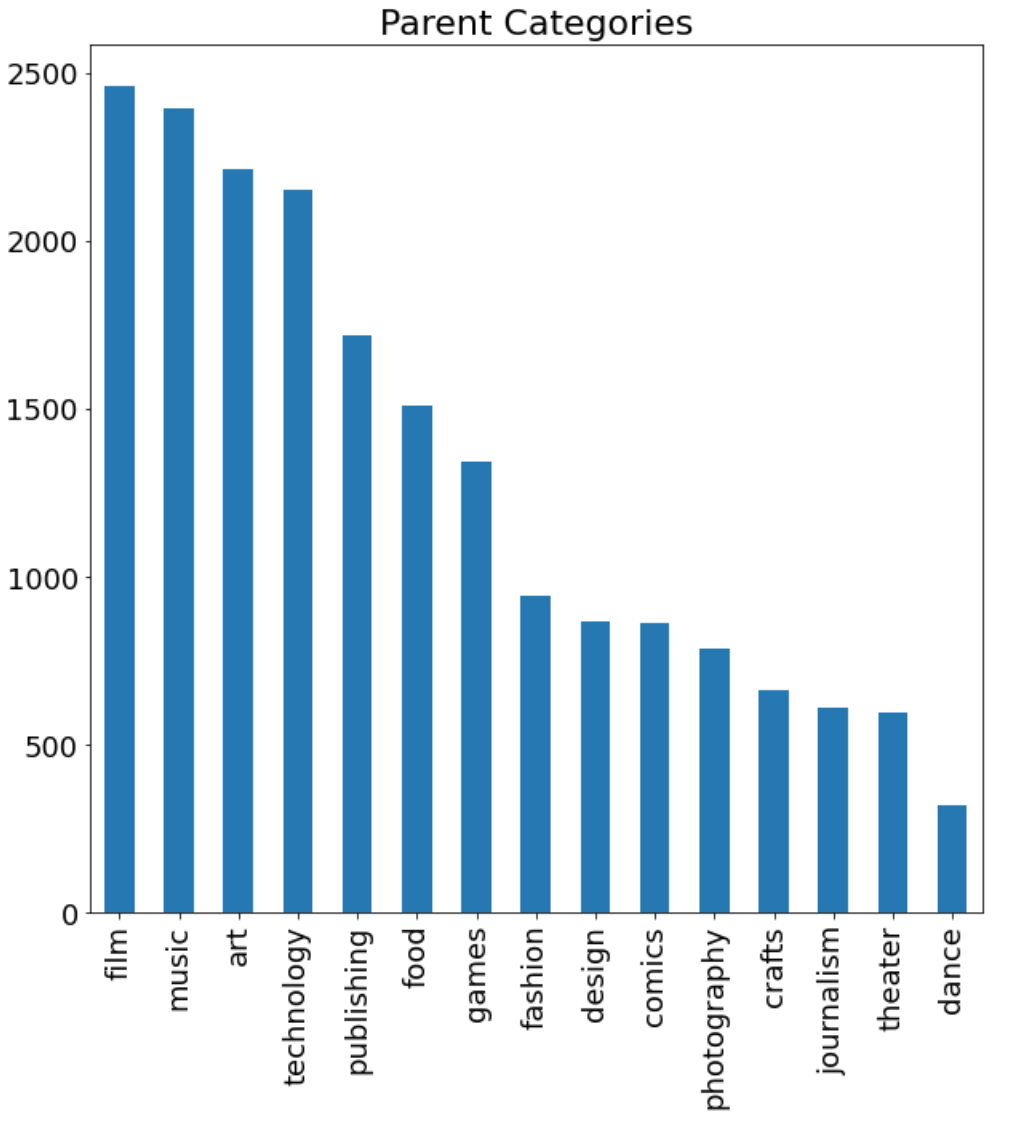

In [10]:
Image("./CategoryCount.png", width= 600, height= 600)


#### Categories sorted by popularity. Entertainment related categories like Film, Music, and Art the top 3 categories.  



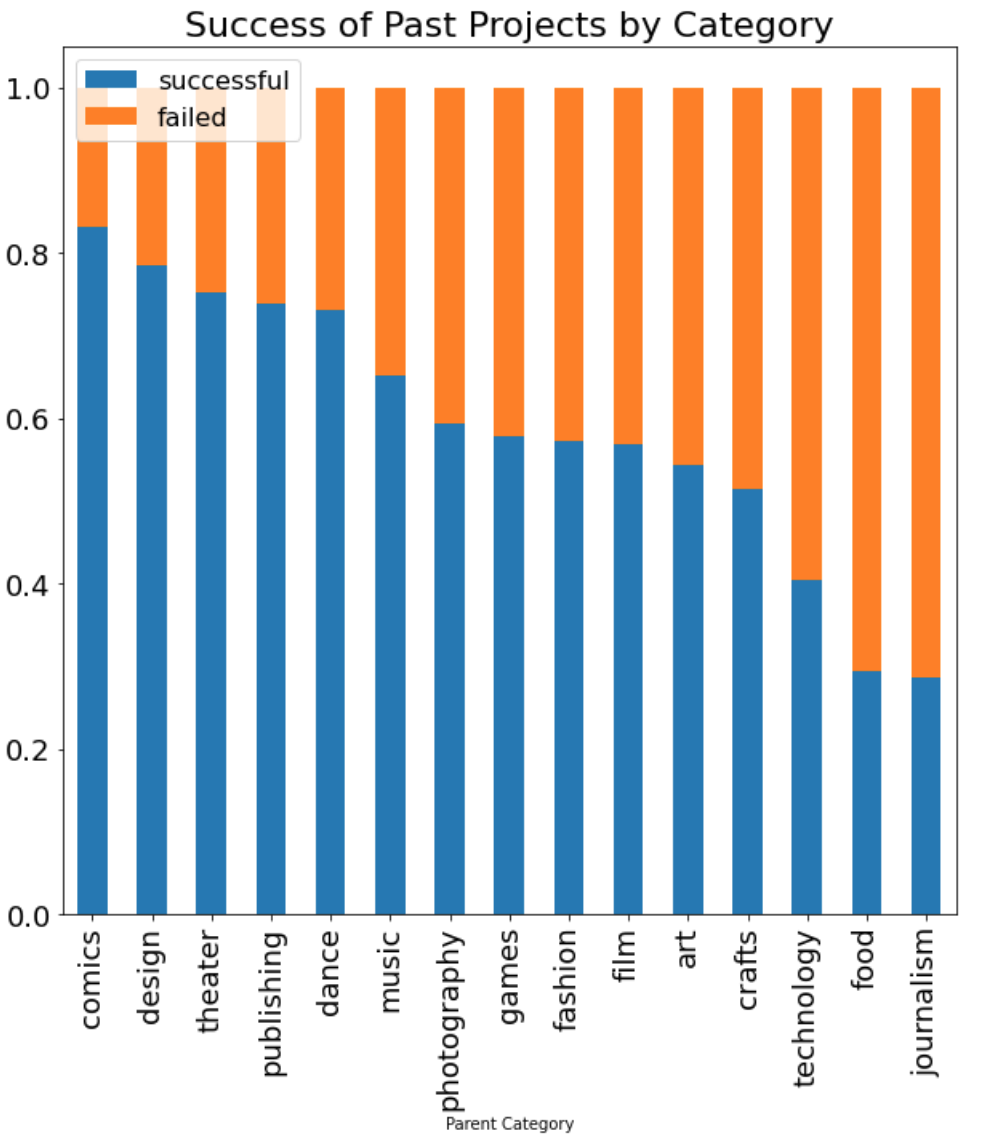

In [8]:
Image("./SuccessByCategory.png", width= 600, height= 600)

#### Percent of successful projects among the different categories. We can see that Comics, Design and Theater are the top 3 categories that have over 75% of their projects fully funded and supported. This can be caused by sample size in each category (low denominator).

### **Funding Goals** 


#### Why is journalism, film, and art , the top 3 popular categories, ranked in bottom 6 of success rate? Aside from possible sample size, let's look at the funding requested between categories ###


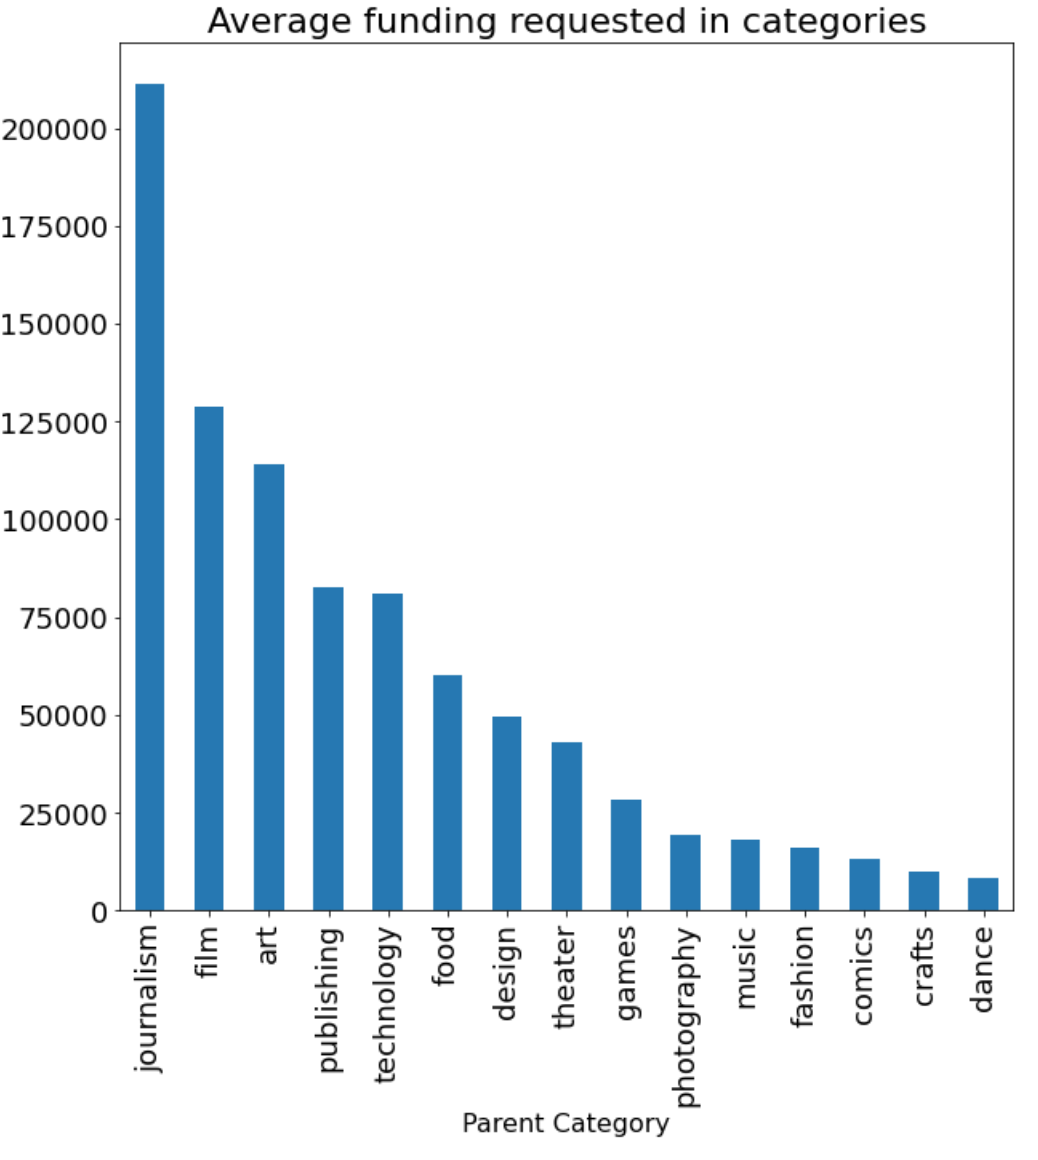

In [7]:
Image("./AverageCategoryFunding.png", width= 600, height= 600)

#### We see that our top 3 categories Journalism, Film, and Art are also the top 3 categories in the **average** (mean) funding among category. With sample size accounted, the top 3 popular categories are also the top 3 categoies that requsted the most funding on average.

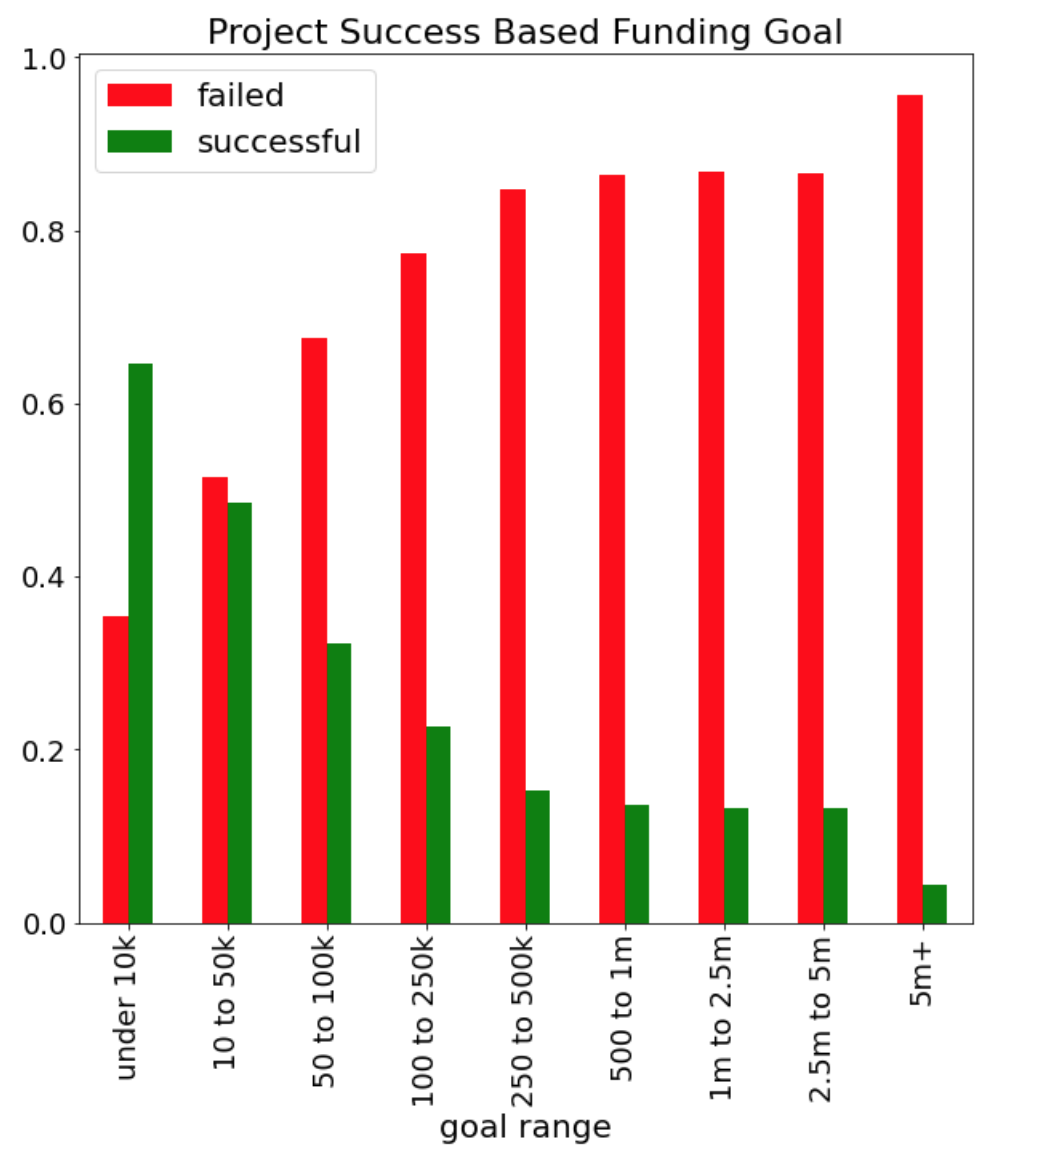

In [12]:
Image("./FundingSuccess.png", width= 600, height= 600)

#### We can also see that among all the projects, as the funding goal increases, the success rate for projects decreases. 

### **Project Duration**

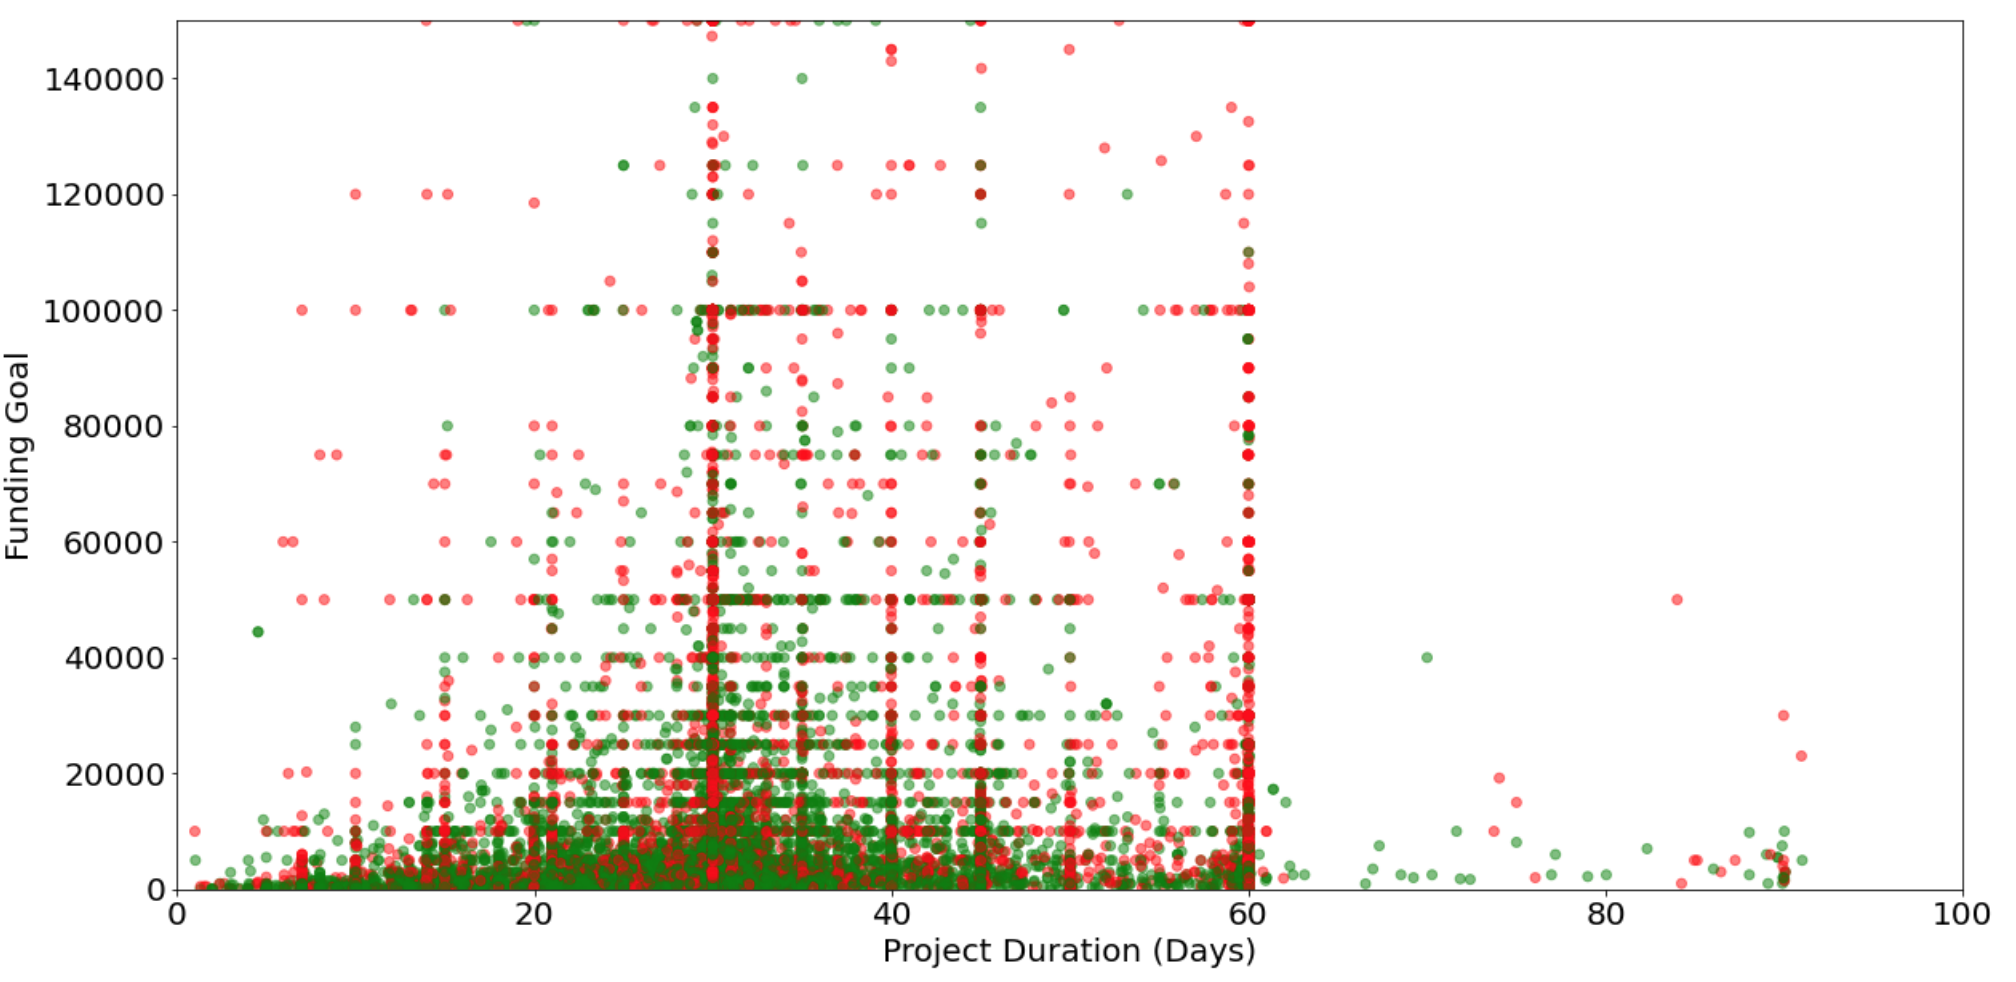

In [18]:
Image("./ProjectDuration.png", width= 800, height= 800)

We see that for the project success is scattered among the different project duration. There is no strong relation but it is a feature we can test in our ML model

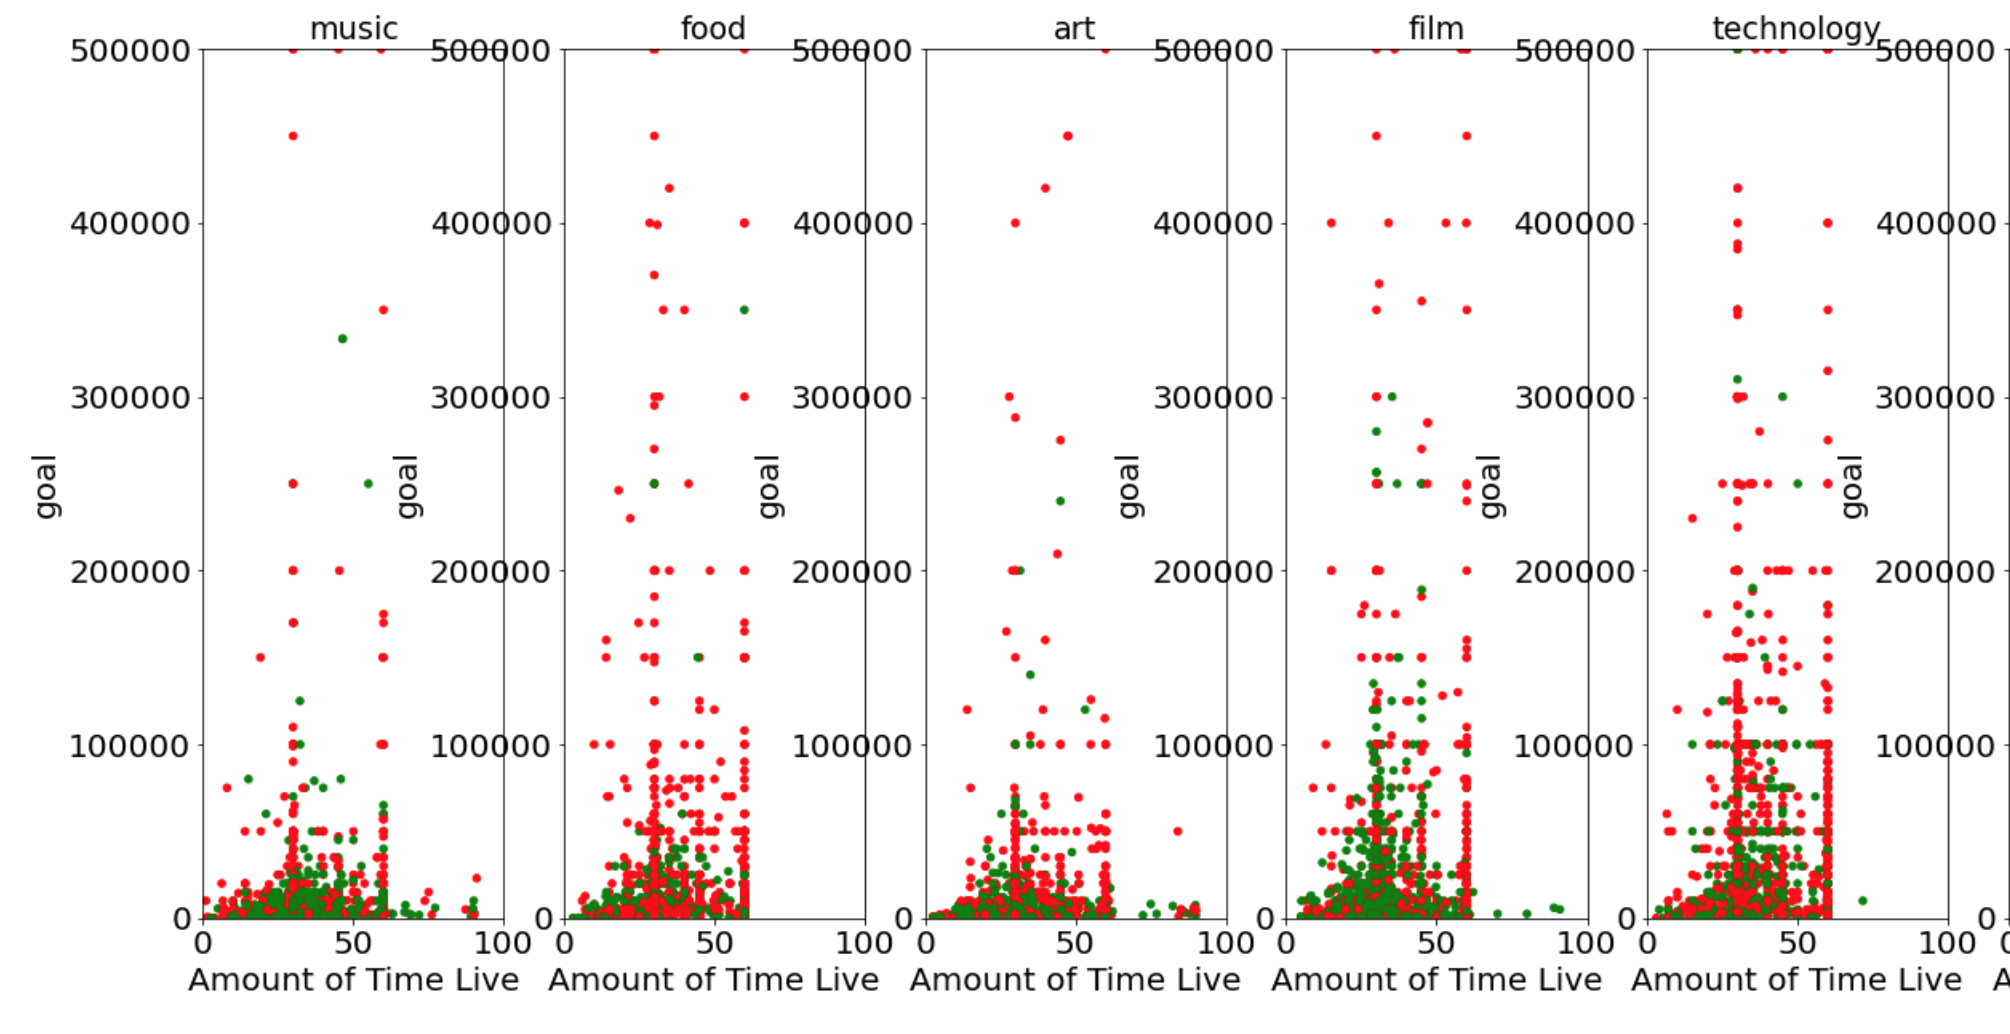

In [19]:
Image("./ProjectDuration2.png", width= 800, height= 800)

## **Step 4: Predicting with Machine Learning**

### **FIRST: Choosing the models**

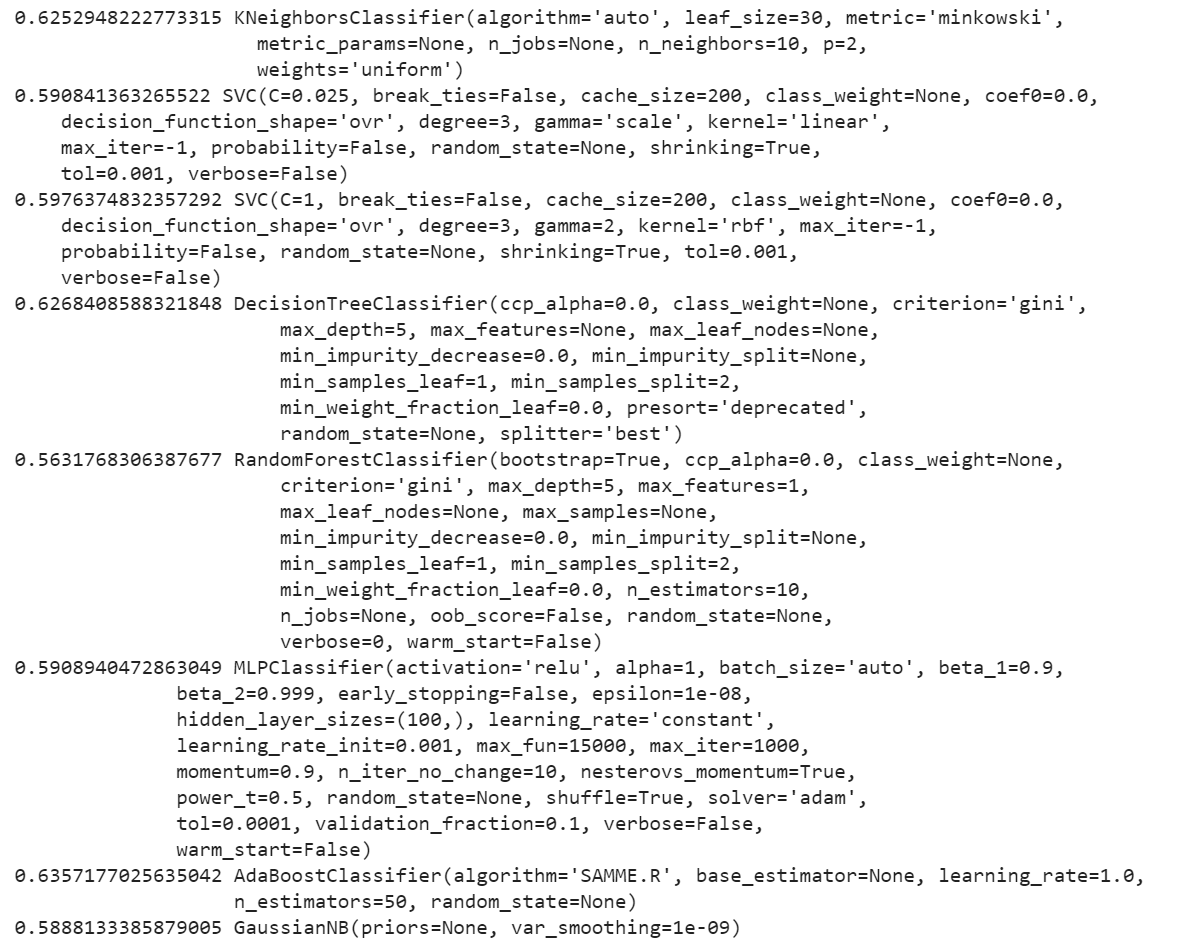

In [0]:
Image("/content/choosingModels.PNG", width=600, height=600)

###**SECOND: Choosing Features**


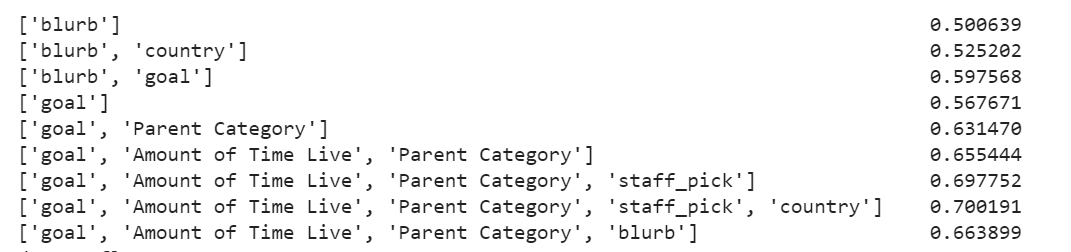

In [0]:
Image("/content/adaBoostFeatures.PNG")

**The best features for the Adaptive Boost Classifier are ['goal', 'Amount of Time Live', 'Parent Category', 'staff_pick', 'country'].**

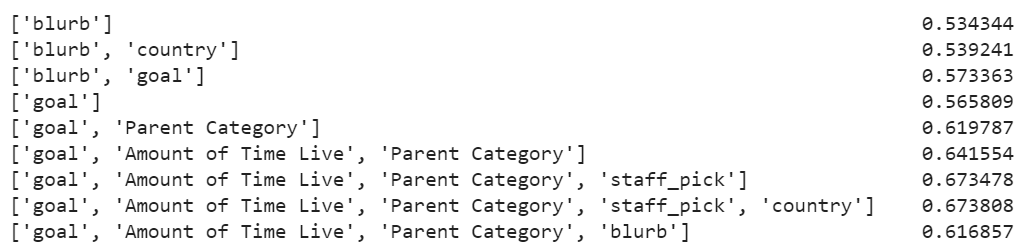

In [0]:
Image("/content/kNeighborFeatures.PNG")

**The best features for the KNeighbor Classifier are ['goal', 'Amount of Time Live', 'Parent Category', 'staff_pick', 'country'].**

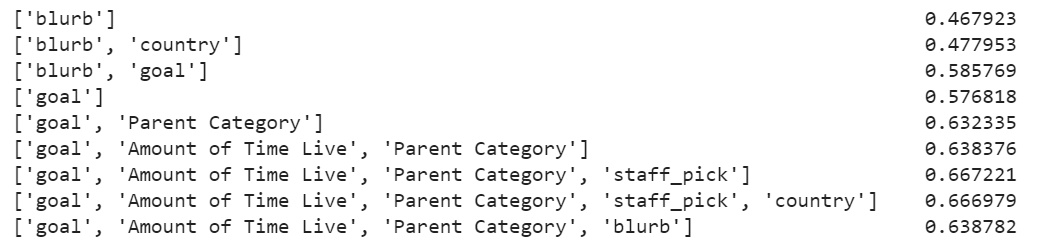

In [0]:
Image("/content/decisionTreeFeatures.PNG")

**The best features for the Decision Tree Classifier are ['goal', 'Amount of Time Live', 'Parent Category', 'staff_pick']**

###**THREE: Hyperparameter Tuning**

*   K = 18 for KNeighbor Classifier.
*   Max depth of 15 for Decision Tree Classifier

###**FOUR: Test Error**

We were able to get the test error by using our models on another set of past projects that our models have not seen before.

**Ada Boost Results:**

*   Precision for successful: 0.8189539561913277
*   Recall for successful: 0.7739754964089565
*   Precision for failed: 0.6071953010279001
*   Recall for failed: 0.6712662337662337



**KNeighbors Results:**

*   Precision for successful: 0.7344658024139472
*   Recall for successful: 0.7648975791433892
*   Precision for failed: 0.6292217327459618
*   Recall for failed: 0.5906271536871124



**Decision Tree Results:**

*   Precision for successful: 0.7621814930710773 
*   Recall for successful: 0.7656039515042659
*   Precision for failed: 0.6167400881057269
*   Recall for failed: 0.6122448979591837



## **Conclusion**

### Project success can be predicted with an F1 score of 0.79582971329279 with the Adaptive Boost Classifier with the following features: 


### *   Goal
### *   Amount of Time Live
### *   Parent Category
### *   Staff Pick
### *   Country



## **Questions?**